In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | abu dhabi
Processing Record 5 of Set 1 | smolenka
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | the valley
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | melsungen
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | challakere
Processing Record 18 of Set 1 | sakaiminato
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Set 1 | jiuq

In [34]:
#create a data frame
citi_samples = pd.DataFrame(city_data)

#display count of weather data values
citi_samples.head()

        

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,100,RU,1562207921,96,69.70,170.27,33.18,2.82
1,qaanaaq,100,GL,1562207921,48,77.48,-69.36,46.14,3.58
2,rikitea,79,PF,1562207922,75,-23.12,-134.97,67.02,25.26
3,abu dhabi,0,AE,1562207627,79,24.47,54.37,91.40,4.70
4,smolenka,6,PL,1562207922,99,54.15,22.76,48.00,12.30


In [33]:
citi_samples.to_csv('citi_samples.csv')

# latitude vs Temperature

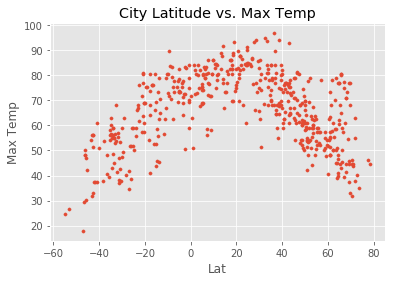

In [37]:
plt.scatter(citi_samples['Lat'], citi_samples['Max Temp'], marker="o", s=10)
plt.title(f"City Latitude vs. Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig("Max_Temp.png")
plt.show()

# Latitude vs Humidity

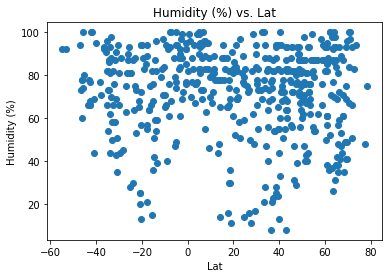

In [22]:
plt.scatter(citi_samples['Lat'], citi_samples['Humidity'])
plt.title(f"Humidity (%) vs. Lat")
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

# Latitude vs Cloudy

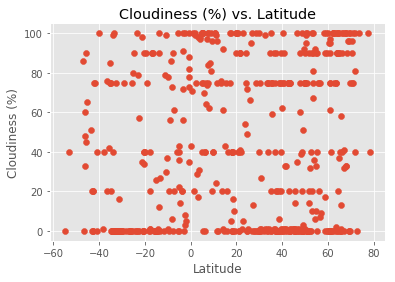

In [30]:
plt.scatter(citi_samples['Lat'], citi_samples['Cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()

# Latitude vs Windspeed 

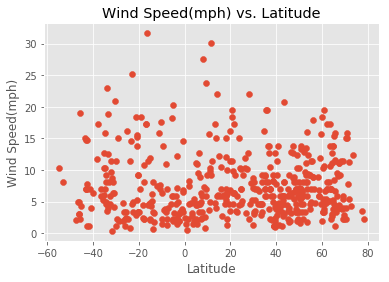

In [31]:
plt.scatter(citi_samples['Lat'], citi_samples['Wind Speed'])
plt.title(f"Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

# Observable Trends / Analysis 

1. I believe there is a relatively strong correlation bewteen latitude and temperature. We can observe that cities near the equator did not experience the highest temperatures, however, high temperatures were more consistent in that area and temperatures are higher the closer to 0 latitude. In this case,  phenomenon may be related to differences in the number of cities that fall along these latitudes as well as the geographic features. To be accurate, concluding that the highest temperatures were observed between latitudes of 20 and 35 degrees and using the average temperature parameter, we can see more consistency of high temperature between -20 and 20 degrees latitude.

2. The correlation between humidity and latitude is weak, humidity is more concentrated at higher values as the latitude approaches the latitude 0 and the cities on the equator experienced most of the latitudes have humidity ranging from 40% to 100%.  

3. As we can see from the graph, the correlation between latitude and wind speed is very weak. As wind speeds increase the latitude drives away from the equator. The most frequent observation was speeds between 0 and 10 mph. Observations decrease in frequency as you increase wind speed with wind speeds greater than 30 mph. Utilizig plotting latitude versus longitude, we can further observe addition patterns in weather by location as well. Local patterns are observed by geographic regions -- wind speed appear to be generally higher closer to coastal regions.

4. No significant correlation was found between latitude and cloudiness.